In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import glob, os
%matplotlib inline  
plt.rcParams['svg.fonttype'] = 'none'
from re import sub



In [2]:
data = pd.read_csv("H01-H12_dataTable.csv",sep=",", header=0,
           dtype={"template_ID":str,"match":int,"template":str,"strandC":str,"strandR":str,"strandR_len":int,"strandC_len":int,"template_align":str,"strand_align":str})

In [3]:
data.head(5)

,template_ID,match,template,strandC,strandR,strandR_len,strandC_len,strand_align,template_align
0,H01,0,AGACTGTGC,AGAC,AAAGGGGGGGGGGGGACCC,19,4,AGAC-----,AGACTGTGC
1,H01,0,AGACTGTGC,AGAGACTGC,AGGAGGGGGGGGGGGGACCTTGGCC,25,9,AGAGACTGC,AGACTGTGC
2,H01,0,AGACTGTGC,AGTGCTGTC,AAGGGGGTGGCCTGGGTTCC,20,9,AGTGCTGT-C,AGA-CTGTGC
3,H01,1,AGACTGTGC,AGACTGTGC,AAAAAAAAAGGGGGGGGGAAACCCCTTGGGGGTTGGGCC,39,9,AGACTGTGC,AGACTGTGC
4,H01,0,AGACTGTGC,AGCGACT,AAAAAAGCGGGGGGGGGGAAACCCCT,26,7,AG-C-GACT,AGACTGTGC


In [4]:
def rle(df):
    run_counts = {'0':[],'1':[],'2':[],'3':[],'4':[],'5':[],'6':[],'7':[]}
    for index, row in df.iterrows():
        curr_rawseq = row['strandR']
        curr_rle = sub(r'(.)\1*', lambda m: ","+str(len(m.group(0)))+"," + m.group(1),curr_rawseq)
        curr_rle_tolist = curr_rle[1:].split(',')
        curr_onlyNumbersString = curr_rle_tolist[::2]
        curr_onlyNumbers = [int(x) for x in curr_onlyNumbersString]
        for i in range(8):
            run_counts[str(i)].append(curr_onlyNumbers[i])
    run_counts_df = pd.DataFrame.from_dict(run_counts)
    return run_counts_df

In [5]:
#extract the perfect strands for each template

H01_perfect = data.loc[(data["template_ID"]=='H01') & (data["match"]==1)]
H02_perfect = data.loc[(data["template_ID"]=='H02') & (data["match"]==1)]
H03_perfect = data.loc[(data["template_ID"]=='H03') & (data["match"]==1)]
H04_perfect = data.loc[(data["template_ID"]=='H04') & (data["match"]==1)]
H05_perfect = data.loc[(data["template_ID"]=='H05') & (data["match"]==1)]
H06_perfect = data.loc[(data["template_ID"]=='H06') & (data["match"]==1)]
H07_perfect = data.loc[(data["template_ID"]=='H07') & (data["match"]==1)]
H08_perfect = data.loc[(data["template_ID"]=='H08') & (data["match"]==1)]
H09_perfect = data.loc[(data["template_ID"]=='H09') & (data["match"]==1)]
H10_perfect = data.loc[(data["template_ID"]=='H10') & (data["match"]==1)]
H11_perfect = data.loc[(data["template_ID"]=='H11') & (data["match"]==1)]
H12_perfect = data.loc[(data["template_ID"]=='H12') & (data["match"]==1)]


In [6]:
# run length encode each perfect strand individually

H01_perfectruns = rle(H01_perfect)
H02_perfectruns = rle(H02_perfect)
H03_perfectruns = rle(H03_perfect)
H04_perfectruns = rle(H04_perfect)
H05_perfectruns = rle(H05_perfect)
H06_perfectruns = rle(H06_perfect)
H07_perfectruns = rle(H07_perfect)
H08_perfectruns = rle(H08_perfect)
H09_perfectruns = rle(H09_perfect)
H10_perfectruns = rle(H10_perfect)
H11_perfectruns = rle(H11_perfect)
H12_perfectruns = rle(H12_perfect)

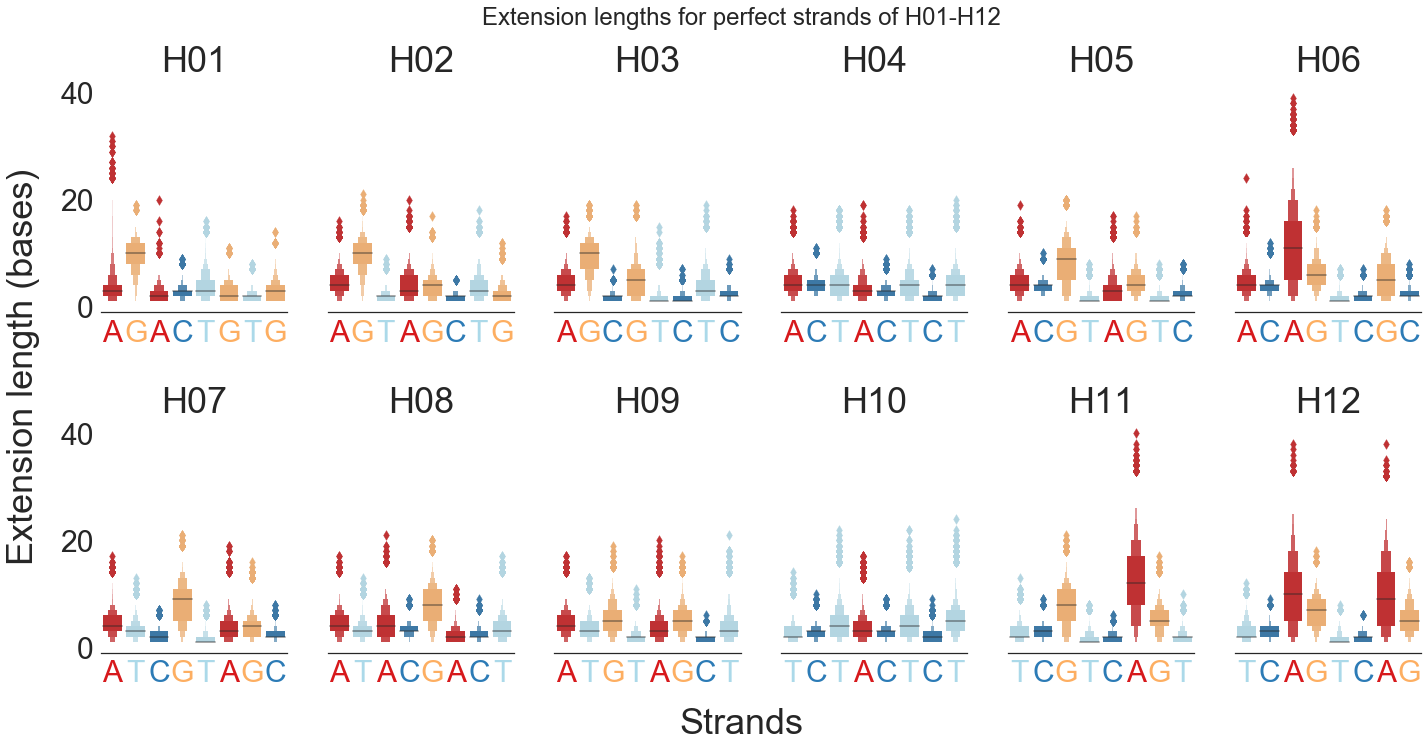

In [7]:
#plot the extension length for each nucleotide, for all perfect strands of H01-H12

plt.rcParams['figure.figsize'] = 4,6
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['MyriadPro']
sns.set(font_scale=3)

sns.set_style("white")
strands = {"H01":"AGACTGTG","H02":"AGTAGCTG", "H03":"AGCGTCTC", "H04":"ACTACTCT", "H05":"ACGTAGTC", "H06":"ACAGTCGC",
        "H07":"ATCGTAGC","H08":"ATACGACT","H09":"ATGTAGCT","H10":"TCTACTCT","H11":"TCGTCAGT","H12":"TCAGTCAG"}

basecolor = {"A":"#d7191c","C":"#2c7bb6","G":"#fdae61","T":"#abd9e9"}


sorder = ['H01','H02','H03','H04','H05','H06','H07','H08','H09','H10','H11','H12']

fig, axes = plt.subplots(nrows=2, ncols=6, sharex=False, sharey=True, figsize=(20,10))
axes_list = axes.flatten()

for (s,a) in zip(sorder,axes_list):
    
    #create the color palette based on the bases 
    num = 0
    my_pal = {}
    colors = []
    currStrand = strands[s]
    for char in currStrand:
        my_pal[str(num)] = basecolor[char]
        colors.append(basecolor[char])
        num+=1

    currData = eval(s+"_perfectruns")

    if(len(currData.columns)>8):
        currData.drop(currData.columns[[-1,]], axis=1, inplace=True)

    g=sns.lvplot(data=currData,ax=a,palette=my_pal)
    g.set(xticklabels=list(currStrand))
    g.set(title=s)

    [t.set_color(i) for (i,t) in zip(colors,a.xaxis.get_ticklabels())]

    a.tick_params(which='both',bottom='off',left='off',right='off',top='off')
    a.spines['left'].set_visible(False)
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    
fig.text(0.5, -0.01, 'Strands', ha='center')
fig.text(-0.01, 0.5, 'Extension length (bases)', va='center', rotation='vertical')
fig.suptitle('Extension lengths for perfect strands of H01-H12', fontsize=24, y=1)
    
plt.tight_layout()
plt.savefig("helloworld_perfect_extensionLengths.pdf")



In [8]:
# tabulate the extension lengths for each of the 12 types of transitions

def countTransitions(df):
    transitions = {'AC':[],'AG':[],'AT':[],'CA':[],'CG':[],'CT':[],
                   'GA':[],'GC':[],'GT':[],'TA':[],'TC':[],'TG':[]}
    
    for index, row in df.iterrows():
        text = row.strandR
        currstr = sub(r'(.)\1*', lambda m: ","+str(len(m.group(0)))+"," + m.group(1),text)
        currstr_tolist = currstr[1:].split(',')
        onlyNumbersString = currstr_tolist[::2]
        onlyChars = currstr_tolist[1::2]
        onlyNumbers = [int(x) for x in onlyNumbersString]
    
        prev = 'G'
        for (char,num) in zip(onlyChars,onlyNumbers):
            if(prev != char): #there is a GG case where the initiator ends in G and first base is G
                currTrans = prev+char
                transitions[currTrans].append(num)
            prev=char
    return transitions

In [9]:
#for those sequences that are 9 long, we need to remove the last extension from each sequence
#so that our length data is consistent

def snipTrailing(row):
    template = row["template_ID"]
    if(len(template)>8):
        curr_seqraw = row["strandR"]
        currstr = sub(r'(.)\1*', lambda m: ","+str(len(m.group(0)))+"," + m.group(1),curr_seqraw)
        currstr_tolist = currstr[1:].split(',')
        onlyNumbersString = currstr_tolist[::2]
        onlyNumbers = [int(x) for x in onlyNumbersString]
        del onlyNumbers[-1]
        trimmedlenraw = sum(onlyNumbers)
        trimmedlencompressed = len(onlyNumbers)
    else:
        trimmedlenraw = row["strandR_len"]
        trimmedlencompressed = len(row.strandC)
    return (trimmedlenraw,trimmedlencompressed)


In [10]:
# trim for the sequences that are 9 long

trimmed_data = {'trimmedlen':[],'trimmedcompressed':[]}
data_noNA = data.dropna()
data_noNA.reset_index(inplace=True)

for index, row in data_noNA.iterrows():
    (curr_rawlen,curr_compressedlen) = snipTrailing(row)
    trimmed_data['trimmedlen'].append(curr_rawlen)
    trimmed_data['trimmedcompressed'].append(curr_compressedlen)

trimmed_data_df = pd.DataFrame.from_dict(trimmed_data)
data_withTrim = pd.concat([data_noNA,trimmed_data_df],axis=1)

In [11]:
# extract only the perfect strands and tabulate extension lengths for each transition

data_withTrim_perfects = data_withTrim.loc[data_withTrim["match"]==1]
trans = countTransitions(data_withTrim_perfects)

df = pd.DataFrame.from_dict(trans, orient='index')
df_melt=pd.melt(df.transpose())
df_melt_dropna = df_melt.dropna()
df_melt_dropna.reset_index(inplace=True)
df_melt_dropna.drop(columns=['index'],inplace=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


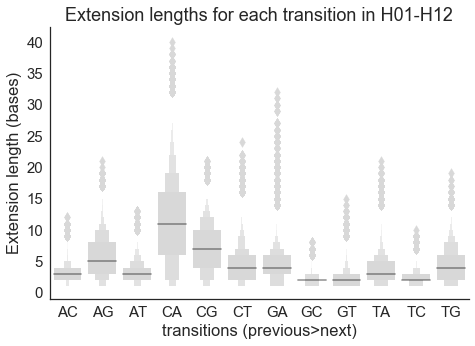

In [12]:
plt.rcParams['figure.figsize'] = 7.5,5
sns.set(font_scale=1.5)
sns.set_style("white")

g = sns.lvplot(x="variable", y="value", data=df_melt_dropna, color='#D8D8D8')
g.set(xlabel='transitions (previous>next)')
g.set(ylabel='Extension length (bases)')
g.set(title='Extension lengths for each transition in H01-H12')
sns.despine()

plt.savefig('perfectTransitions.pdf')



In [13]:
# visualize the increase in raw lengths as a function of template length (or cycles)

data_withTrim.drop(columns=['index'],inplace=True)
data_withTrim_compressed8 = data_withTrim.loc[(data_withTrim["trimmedcompressed"]<=8)&(data_withTrim["trimmedcompressed"]>0)]

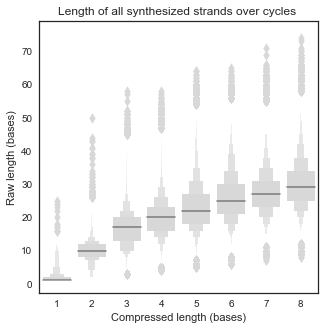

In [14]:
sns.set(font_scale=1)
sns.set_style("white")

fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(5,5))
g=sns.lvplot(x="trimmedcompressed",y="trimmedlen",data=data_withTrim_compressed8,color='#D8D8D8',ax=axes)
g.set(xlabel='Compressed length (bases)')
g.set(ylabel='Raw length (bases)')
g.set(title='Length of all synthesized strands over cycles ')

plt.savefig('Length_raw_to_cycles.pdf')

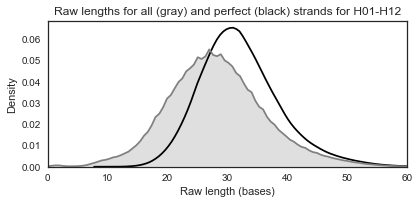

In [15]:
# raw lengths of perfect strands vs all synthesized strands

plt.rcParams['figure.figsize'] = 6,3
sns.set(font_scale=1)
sns.set_style("white")

rawlengths = data_withTrim["trimmedlen"].astype("float")
matches = data_withTrim.loc[data_withTrim["match"]==1, "trimmedlen"].astype("float")

g=sns.kdeplot(matches,color="black",bw=0.75)
g=sns.kdeplot(rawlengths,color='gray',bw=0.75,shade=True)
g.set(xlim=(0, 60))
g.set(xlabel='Raw length (bases)')
g.set(ylabel='Density')
g.set(title='Raw lengths for all (gray) and perfect (black) strands for H01-H12')
g.legend_.remove()

plt.tight_layout()

plt.savefig("helloworld_bulklengths.pdf")


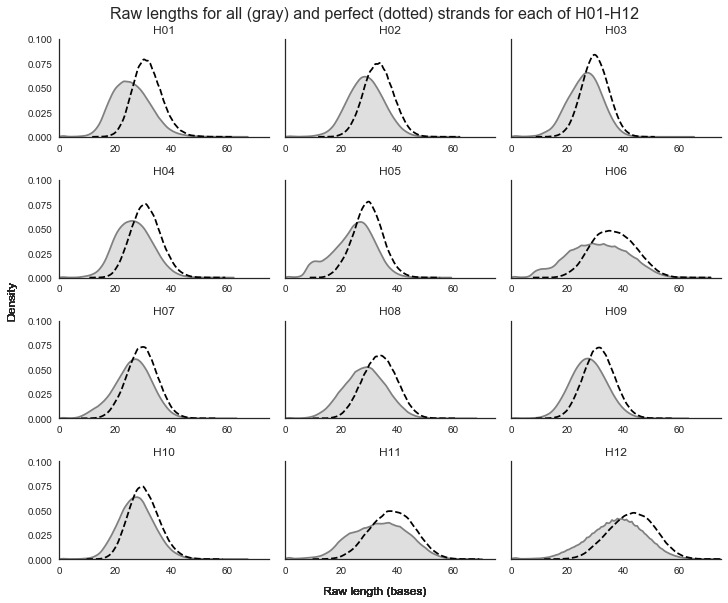

In [16]:
#plot the trimmed length distributions

sns.set(font_scale=1)
sns.set_style("white")

sorder = ['H01','H02','H03','H04','H05','H06','H07','H08','H09','H10','H11','H12']

fig, axes = plt.subplots(nrows=4, ncols=3, sharex=False, sharey=True, figsize=(10,8))
axes_list = axes.flatten()

for (s,a) in zip(sorder,axes_list):
    currSample = data_withTrim.loc[data_withTrim["template_ID"]==s]
    rawlengths = currSample["trimmedlen"].astype("float")
    matches = currSample.loc[currSample["match"]==1, "trimmedlen"].astype("float")
    
    g=sns.kdeplot(rawlengths,shade=True,bw=0.75,color="gray",ax=a)
    g=sns.kdeplot(matches, bw=0.75,color="black",linestyle='dashed',ax=a)
    g.set(title=s)
    g.legend_.remove()
    g.set(xlim=(0, 75),ylim=(0, 0.1))
    a.tick_params(which='both',bottom='off',left='off',right='off',top='off')
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

    fig.text(0.5, -0.01, 'Raw length (bases)', ha='center')
    fig.text(-0.01, 0.5, 'Density', va='center', rotation='vertical')
    fig.suptitle('Raw lengths for all (gray) and perfect (dotted) strands for each of H01-H12', fontsize=16, y=1.01)

    plt.tight_layout()
plt.savefig("helloworld_lengthdist.pdf")


In [17]:
# tabulates mismatches, insertions, and missing from pre-computed alignments

def bulkErrors_count(df):
    #to account for 0s
    matches = [0]*(9)
    mismatches = [0]*(9)
    deletions = [0]*(9)
    insertions = [0]*(9)
    
    num_analyzed = 0
    for index, row in df.iterrows():
        currMatches, currMismatches, currDeletions, currInsertions = 0,0,0,0
        template = row['template']
        template_aligned = list(row['template_align'])
        query_aligned = list(row['strand_align'])

        if(len(template)>8):
            #find terminal C index
            for i in range(len(template)):
                if(template_aligned[-i]=='C'):
                    break
            template_aligned = template_aligned[:-i]
            query_aligned = query_aligned[:-i]
        num_analyzed+=1
        for char_template, char_query in zip(template_aligned, query_aligned):
            action = ''  
            if(char_template == char_query): #match
                currMatches+=1
                action = 'match'
            elif(char_template == '-'):   #insertion           
                currInsertions+=1
                action = 'insertion'
            elif((char_template != char_query) and char_query != '-'): #mismatch if not deletion
                currMismatches+=1
                action = 'mismatch'
            elif(char_query == '-'): #deletion in query
                currDeletions+=1
                action = 'deletion'
        matches[currMatches]+=1
        mismatches[currMismatches]+=1
        deletions[currDeletions]+=1
        insertions[currInsertions]+=1
        
    bulkData = {'matches':matches,'mismatches':mismatches,'deletions':deletions,'insertions':insertions, 'total':num_analyzed}
    return bulkData

In [18]:
# tabulate errors for all synthesized strands

numBases = list(range(0,9))
all_errors = bulkErrors_count(data)

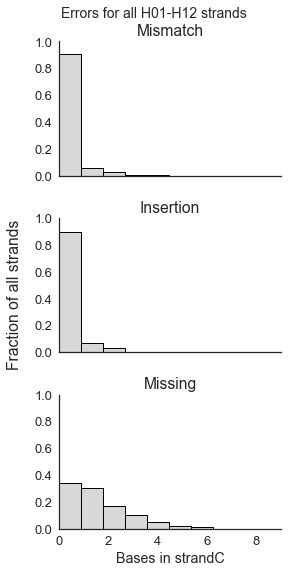

In [19]:
# plot errors for all synthesized strands in bulk

plt.rcParams['figure.figsize'] = 8,8
sns.set(font_scale=1.3)
sns.set_style("white")

numBases = list(range(0,9))

mismatches = all_errors['mismatches']
mismatches_normalized = [entry/all_errors['total'] for entry in mismatches]

insertions = all_errors['insertions']
insertions_normalized = [entry/all_errors['total'] for entry in insertions]

deletions = all_errors['deletions']
deletions_normalized = [entry/all_errors['total'] for entry in deletions]

fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=(4,8))
axes_list = axes.flatten()

axes_list[0].hist(numBases,9, weights = mismatches_normalized, edgecolor='black', linewidth=1,color='#D8D8D8')
axes_list[0].set_ylim(0,1)
axes_list[0].set_xlim(0,9)
sns.despine(ax=axes_list[0])
axes_list[0].set_title('Mismatch')

axes_list[1].hist(numBases,9, weights = insertions_normalized,edgecolor='black', linewidth=1,color='#D8D8D8')
axes_list[1].set_ylim(0,1)
axes_list[1].set_xlim(0,9)
sns.despine(ax=axes_list[1])
axes_list[1].set_title('Insertion')

axes_list[2].hist(numBases,9, weights = deletions_normalized,edgecolor='black', linewidth=1,color='#D8D8D8')
axes_list[2].set_ylim(0,1)
axes_list[2].set_xlim(0,9)
sns.despine(ax=axes_list[2])
axes_list[2].set_title('Missing')
axes_list[2].set_xlabel('Bases in strandC')


fig.text(-0.01, 0.5, 'Fraction of all strands', va='center', rotation='vertical')
fig.suptitle('Errors for all H01-H12 strands', fontsize=14, y=1)

plt.tight_layout()
plt.savefig("helloworld_bulkerrors.pdf")


In [20]:
# select all strands for each template sequence individually

H01 = data.loc[data["template_ID"]=='H01']
H02 = data.loc[data["template_ID"]=='H02']
H03 = data.loc[data["template_ID"]=='H03']
H04 = data.loc[data["template_ID"]=='H04']
H05 = data.loc[data["template_ID"]=='H05']
H06 = data.loc[data["template_ID"]=='H06']
H07 = data.loc[data["template_ID"]=='H07']
H08 = data.loc[data["template_ID"]=='H08']
H09 = data.loc[data["template_ID"]=='H09']
H10 = data.loc[data["template_ID"]=='H10']
H11 = data.loc[data["template_ID"]=='H11']
H12 = data.loc[data["template_ID"]=='H12']


In [21]:
# tabulate errors for strands synthesized per template

H01_errors = bulkErrors_count(H01)
H02_errors = bulkErrors_count(H02)
H03_errors = bulkErrors_count(H03)
H04_errors = bulkErrors_count(H04)
H05_errors = bulkErrors_count(H05)
H06_errors = bulkErrors_count(H06)
H07_errors = bulkErrors_count(H07)
H08_errors = bulkErrors_count(H08)
H09_errors = bulkErrors_count(H09)
H10_errors = bulkErrors_count(H10)
H11_errors = bulkErrors_count(H11)
H12_errors = bulkErrors_count(H12)

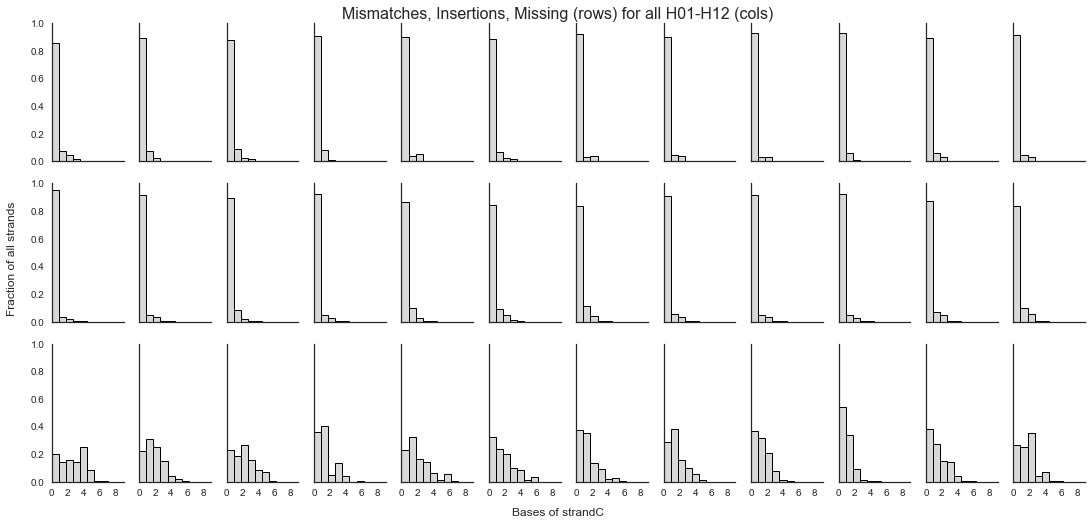

In [22]:
# plot errors for strands synthesized per template sequence

import matplotlib.ticker as plticker

plt.rcParams['figure.figsize'] = 8,8
sns.set(font_scale=1)
sns.set_style("white")

numBases = list(range(0,9))

errors_to_plot = [H01_errors, H02_errors, H03_errors, H04_errors, H05_errors, H06_errors, 
                 H07_errors, H08_errors, H09_errors, H10_errors, H11_errors, H12_errors]

fig, axes = plt.subplots(nrows=3, ncols=len(errors_to_plot), sharex=True, sharey=True, figsize=(15,7))
axes_list = axes.flatten()
i=0

loc = plticker.MultipleLocator(base=2.0) 

for strands in errors_to_plot:
    
    curr_mismatches = strands['mismatches']
    curr_mismatches_normalized = [entry/strands['total'] for entry in curr_mismatches]

    curr_insertions = strands['insertions']
    curr_insertions_normalized = [entry/strands['total'] for entry in curr_insertions]

    curr_deletions = strands['deletions']
    curr_deletions_normalized = [entry/strands['total'] for entry in curr_deletions]

    axes_list[i].hist(numBases,9, weights = curr_mismatches_normalized, edgecolor='black', linewidth=1,color='#D8D8D8')
    axes_list[i].set_ylim(0,1)
    axes_list[i].set_xlim(0,9)
    axes_list[i].xaxis.set_major_locator(loc)
    sns.despine(ax=axes_list[i])

    axes_list[i+1*len(errors_to_plot)].hist(numBases,9, weights = curr_insertions_normalized,edgecolor='black', linewidth=1,color='#D8D8D8')
    axes_list[i+1*len(errors_to_plot)].set_ylim(0,1)
    axes_list[i+1*len(errors_to_plot)].set_xlim(0,9)
    axes_list[i+1*len(errors_to_plot)].xaxis.set_major_locator(loc)
    sns.despine(ax=axes_list[i+len(errors_to_plot)])

    axes_list[i+2*len(errors_to_plot)].hist(numBases,9, weights = curr_deletions_normalized,edgecolor='black', linewidth=1,color='#D8D8D8')
    axes_list[i+2*len(errors_to_plot)].set_ylim(0,1)
    axes_list[i+2*len(errors_to_plot)].set_xlim(0,9)
    axes_list[i+2*len(errors_to_plot)].xaxis.set_major_locator(loc)
    sns.despine(ax=axes_list[i+2*len(errors_to_plot)])
    
    i+=1

fig.text(0.5, -0.01, 'Bases of strandC', ha='center')
fig.text(-0.01, 0.5, 'Fraction of all strands', va='center', rotation='vertical')
fig.suptitle('Mismatches, Insertions, Missing (rows) for all H01-H12 (cols)', fontsize=16, y=1)

plt.tight_layout()
plt.savefig("helloworld_individualerrors.pdf")
